In [1]:
import os
import numpy as np
import tensorflow as tf
from datasets import data as dataset
from models.nn import YOLO as ConvNet
#install scipy imageio

In [2]:
from learning.optimizers import MomentumOptimizer as Optimizer

In [3]:
from learning.evaluators import RecallEvaluator as Evaluator

In [4]:
""" 1. Load and split datasets """
root_dir = os.path.join('./data/face/') # FIXME
trainval_dir = os.path.join(root_dir, 'train')

In [5]:
# Load anchors
anchors = dataset.load_json(os.path.join(trainval_dir, 'anchors.json'))


In [6]:
# Set image size and number of class
IM_SIZE = (416, 416)
NUM_CLASSES = 1

In [7]:
# Load trainval set and split into train/val sets
X_trainval, y_trainval = dataset.read_data(trainval_dir, IM_SIZE)
trainval_size = X_trainval.shape[0]
val_size = int(trainval_size * 0.1) # FIXME
val_set = dataset.DataSet(X_trainval[:val_size], y_trainval[:val_size])
train_set = dataset.DataSet(X_trainval[val_size:], y_trainval[val_size:])

In [8]:
""" 2. Set training hyperparameters"""
hp_d = dict()


In [9]:
# FIXME: Training hyperparameters
hp_d['batch_size'] = 2
hp_d['num_epochs'] = 50
hp_d['init_learning_rate'] = 1e-4
hp_d['momentum'] = 0.9
hp_d['learning_rate_patience'] = 10
hp_d['learning_rate_decay'] = 0.1
hp_d['eps'] = 1e-8
hp_d['score_threshold'] = 1e-4
hp_d['nms_flag'] = True

In [10]:
""" 3. Build graph, initialize a session and start training """
graph = tf.get_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = False

In [11]:
model = ConvNet([IM_SIZE[0], IM_SIZE[1], 3], NUM_CLASSES, anchors, grid_size=(IM_SIZE[0]//32, IM_SIZE[1]//32))


layer1.shape [None, 208, 208, 32]
layer2.shape [None, 104, 104, 64]
layer3.shape [None, 104, 104, 128]
layer4.shape [None, 104, 104, 64]
layer5.shape [None, 52, 52, 128]
layer6.shape [None, 52, 52, 256]
layer7.shape [None, 52, 52, 128]
layer8.shape [None, 26, 26, 256]
layer9.shape [None, 26, 26, 512]
layer10.shape [None, 26, 26, 256]
layer11.shape [None, 26, 26, 512]
layer12.shape [None, 26, 26, 256]
layer13.shape [None, 13, 13, 512]
layer14.shape [None, 13, 13, 1024]
layer15.shape [None, 13, 13, 512]
layer16.shape [None, 13, 13, 1024]
layer17.shape [None, 13, 13, 512]
layer18.shape [None, 13, 13, 1024]
layer19.shape [None, 13, 13, 1024]
layer20.shape [None, 13, 13, 1024]
layer21.shape [None, 13, 13, 1280]
layer22.shape [None, 13, 13, 1024]
pred.shape [None, 13, 13, 5, 6]


In [12]:
evaluator = Evaluator()


In [13]:
optimizer = Optimizer(model, train_set, evaluator, val_set=val_set, **hp_d)


In [14]:
sess = tf.Session(graph=graph, config=config)


Running training loop...
Number of training iterations: 59050
start_time1547057284.934158
num_steps59050
[epoch 1]	loss: 0.152891 |Train score: 1.000000 |Eval score: 0.755274 |lr: 0.000100
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050
num_steps59050


KeyboardInterrupt: 

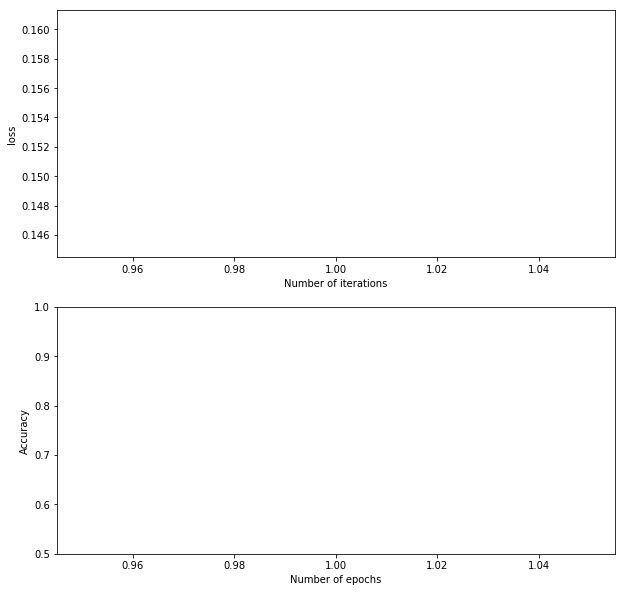

In [15]:
train_results = optimizer.train(sess, details=True, verbose=True, **hp_d)
